<a href="https://colab.research.google.com/github/ShashankDsa/Project-2/blob/main/Item_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/sample_data/train 2.csv',low_memory=False,parse_dates=['date'],index_col=['date'])
df.head()         

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [2]:
df.shape

(913000, 3)

In [3]:
df.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
df=df.sort_values('date',ascending=True)
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-01,7,12,26
2013-01-01,7,46,27
2013-01-01,8,12,54
2013-01-01,9,12,35
...,...,...,...
2017-12-31,9,34,21
2017-12-31,10,34,32
2017-12-31,1,35,55


### **Group by Item**

In [5]:
data=df.groupby(['item','date'])['sales'].sum().reset_index()
data.head()

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149


In [6]:
data.shape

(91300, 3)

### **Three Month Agregate**

In [7]:
datas=[]
for i in data.item.unique():
  tmp=data.loc[data.item==i,:]
  tmp['sales']=tmp['sales'].rolling(90).sum().shift(-89)
  datas.append(tmp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
len(datas)

50

In [12]:
for i in range(len(datas)):
  datas[i]=datas[i].dropna(axis=0)

###**Year VS Sales**

Enter the item number to view sales of each item : 0


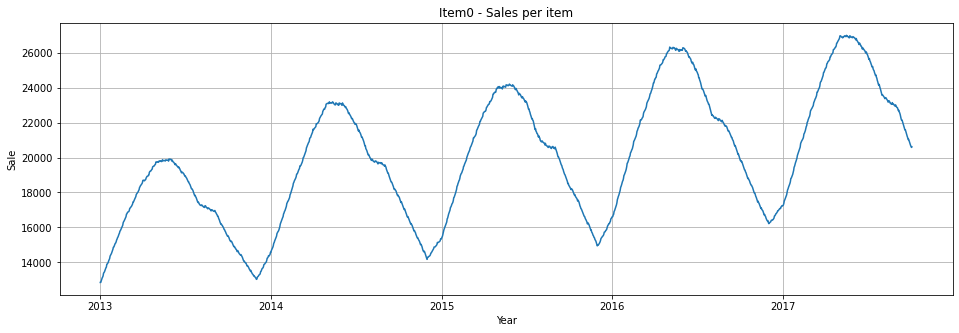

In [11]:
def plot_item(df_raw,i):
  plt.subplots(figsize=(16,5))
  plt.grid()
  plt.xlabel("Year")
  plt.ylabel("Sale")
  plt.title('Item' +str(i)+' - Sales per item')
  plt.plot(df_raw['date'],df_raw['sales'])


item_input=int(input('Enter the item number to view sales of each item : '))
plot_item(datas[item_input],item_input)

### From the graph we can see that there is a consistent seasonality in sales of item 0. Mid year, when the summer vacation ends and the school year begins seems to be the most important time of the year in terms of sales for item 0

### **New Features**

In [13]:
def date_features(datas):
  for i in range(len(datas)):
    datas[i]['year']=datas[i].date.dt.year
    datas[i]['month']=datas[i].date.dt.month
    datas[i]['day_of_month']=datas[i].date.dt.day
    datas[i]['day_of_year']=datas[i].date.dt.dayofyear
    datas[i]['week']=datas[i].date.dt.weekofyear
    datas[i]['day_of_week']=datas[i].date.dt.dayofweek
    datas[i]['is_kind']=datas[i].date.dt.weekday//5
    datas[i]['is_month_start']=datas[i].date.dt.is_month_start.astype(int)
    datas[i]['is_month_end']=datas[i].date.dt.is_month_end.astype(int)
  return datas


datas=date_features(datas)
datas[0].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,item,date,sales,year,month,day_of_month,day_of_year,week,day_of_week,is_kind,is_month_start,is_month_end
0,1,2013-01-01,12847.0,2013,1,1,1,1,1,0,1,0
1,1,2013-01-02,12848.0,2013,1,2,2,1,2,0,0,0
2,1,2013-01-03,12936.0,2013,1,3,3,1,3,0,0,0
3,1,2013-01-04,13019.0,2013,1,4,4,1,4,0,0,0
4,1,2013-01-05,13103.0,2013,1,5,5,1,5,1,0,0


### **Year vs Sales**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


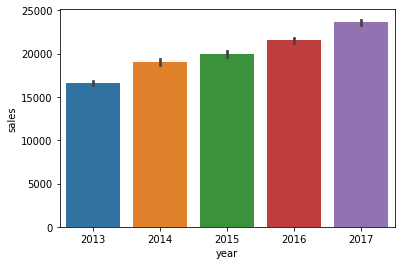

In [14]:
import seaborn as sns
sns.barplot(datas[0]['year'],datas[0]['sales'])

### There is linear relation between year and sales

### **Month vs Sales**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


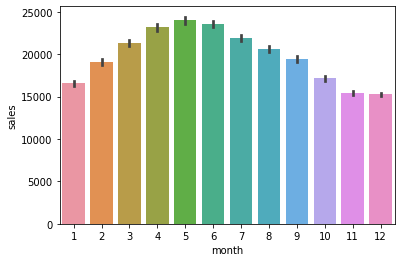

In [15]:
sns.barplot(datas[0]['month'],datas[0]['sales'])

### There is no linear relation between month and sales

### **Week vs Sales**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


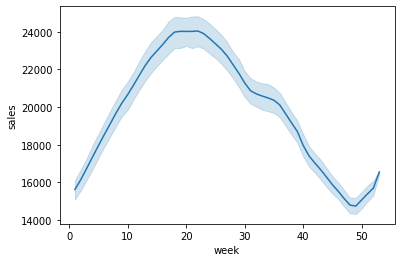

In [16]:
sns.lineplot(datas[0]['week'],datas[0]['sales'])

### there is no linear relation between week vs sales

### **Day of year vs Slaes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


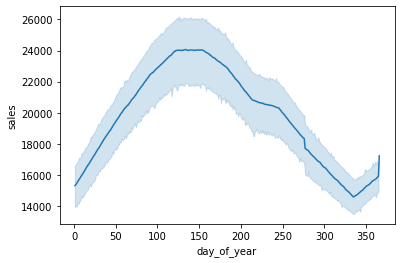

In [17]:
sns.lineplot(datas[0]['day_of_year'],datas[0]['sales'])

In [18]:
datas[0]['is_month_start'].unique()

array([1, 0])

### There is no relation between day of year vs sales

### **Day of Month VS Sales**

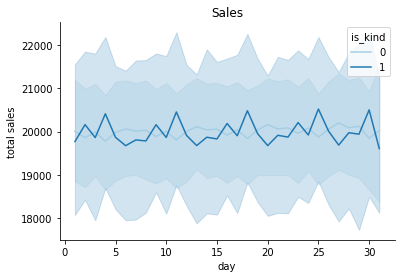

In [19]:
sns.set_palette(sns.color_palette('Paired'))

ax=sns.lineplot(x='day_of_month',y='sales',data=datas[0],hue='is_kind')
ax.set_title('Sales')
ax.set_xlabel('day')
ax.set_ylabel('total sales')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### There is no linear relation

In [21]:
datas[0].shape

(1737, 12)

In [20]:
datas[0].columns

Index(['item', 'date', 'sales', 'year', 'month', 'day_of_month', 'day_of_year',
       'week', 'day_of_week', 'is_kind', 'is_month_start', 'is_month_end'],
      dtype='object')

### **Split the data train and test**

In [23]:
#X = df.drop(['sales','year','store','date','month'], axis=1) # select all rows and select all columns except the last column as my feature
X=datas[0].loc[:,['item',  'year', 'month', 'day_of_month', 'day_of_year',
       'week', 'day_of_week', 'is_kind', 'is_month_start', 'is_month_end']]
y = datas[0]["sales"].values # target as arrays

# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [24]:
X_train

,item,year,month,day_of_month,day_of_year,week,day_of_week,is_kind,is_month_start,is_month_end
1554,1,2017,4,4,94,14,1,0,0,0
1441,1,2016,12,12,347,50,0,0,0,0
1245,1,2016,5,30,151,22,0,0,0,0
631,1,2014,9,24,267,39,2,0,0,0
49,1,2013,2,19,50,8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
715,1,2014,12,17,351,51,2,0,0,0
905,1,2015,6,25,176,26,3,0,0,0
1096,1,2016,1,2,2,53,5,1,0,0
235,1,2013,8,24,236,34,5,1,0,0


### **XGBoost Model**

In [25]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(learning_rate=0.1)
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

[11:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9981111518879894

###  R2 score is 0.998. A very good score

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.29665
Feature: 2, Score: 0.31343
Feature: 3, Score: 0.00093
Feature: 4, Score: 0.16106
Feature: 5, Score: 0.22723
Feature: 6, Score: 0.00047
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00022


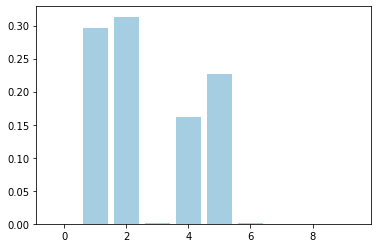

In [26]:
# get importance
importance = xgb_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Month, Year, Day of Year, Week are the most important features

### **Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.9988287939828436

### R2 score is 0.998. A very good R2 score

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.30211
Feature: 2, Score: 0.33924
Feature: 3, Score: 0.00243
Feature: 4, Score: 0.30116
Feature: 5, Score: 0.05491
Feature: 6, Score: 0.00011
Feature: 7, Score: 0.00003
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


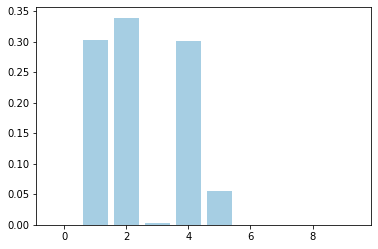

In [28]:
# get importance
importance = dt_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Month, Year, Day of year, Week are the most important features

### **Random Forest**

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.999665165428234

### R2 score is 0.999. A very good R2 score

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.29891
Feature: 2, Score: 0.05905
Feature: 3, Score: 0.00248
Feature: 4, Score: 0.46145
Feature: 5, Score: 0.17791
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.00004
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00001


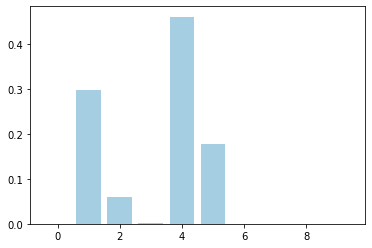

In [30]:
# get importance
importance = rf_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Day of year is most important followed by Year, Week, Month

### **KNN**

In [31]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance


# define the model
knn= KNeighborsRegressor()
# fit the model

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8963444202155709

### KNN's R2 score is good but much lower compared to the other models

Feature: 0, Score: 0.00000
Feature: 1, Score: 2891772.29237
Feature: 2, Score: 32.41965
Feature: 3, Score: 1251836.12946
Feature: 4, Score: 18865018.21489
Feature: 5, Score: 2029035.81466
Feature: 6, Score: 746653.97105
Feature: 7, Score: -19795.33431
Feature: 8, Score: -395.50436
Feature: 9, Score: -321.47668


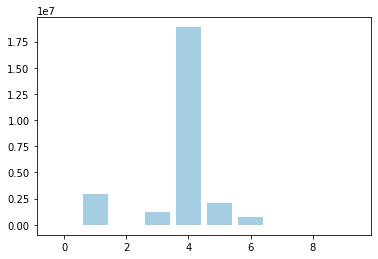

In [32]:
# perform permutation importance
results = permutation_importance(knn, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Day of Year is most important followed by Year, Week, Day of month and Day of week)

### **Conclusion**

### The best model is Random Forest, giving us an R2 score of 0.99966.
### Day of year is the most important feature, followed by Year, Week, Month